## Example of how to control Tektronix Oscilloscope  RIGOL MSO2102A using PyVISA 

In [1]:
# test pyvisa
import pyvisa
rm = pyvisa.ResourceManager('@py')
print(rm.list_resources())
instr = rm.open_resource('TCPIP0::192.168.2.2::INSTR')
print(instr.query('*IDN?'))

('TCPIP::192.168.2.2::INSTR',)
RIGOL TECHNOLOGIES,MSO2102A,DS2F214100395,00.03.06



In [2]:
from oscrigol import *

In [3]:
MSO2102A = Oscrigol(ip_address="192.168.2.2")

In [4]:
MSO2102A.config(channels=(1,), triggerSource="CHAN1", triggerLevel=0.1, vAutoScale=True)

In [5]:
MSO2102A.initComm()
print("ID:", MSO2102A.getID())
MSO2102A.closeComm()

ID: RIGOL TECHNOLOGIES,MSO2102A,DS2F214100395,00.03.06



In [6]:
meas = MSO2102A()
print("ID:", meas)

ID: [[-0.007     -0.00699   -0.00698   ...  0.00697    0.00698    0.00699  ]
 [ 1.4699496  1.5399472  1.4699496 ... -1.487449  -1.4349508 -1.487449 ]]


In [7]:
import matplotlib.pyplot as plt

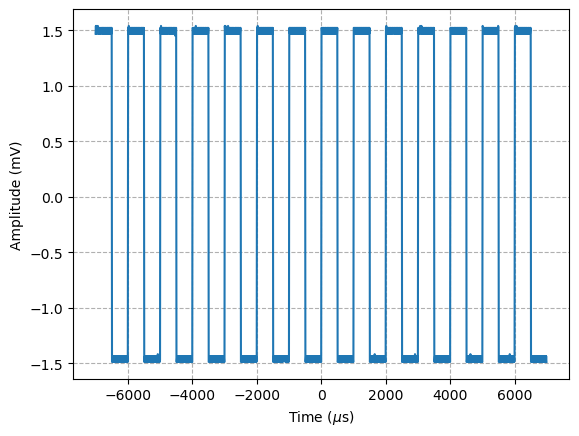

In [8]:
t = meas[0]
v = meas[1] 
plt.figure()
plt.plot(t*1e6,v) # (us,V)
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Amplitude (mV)')
plt.grid(linestyle = '--')

In [10]:
print("tiempo",len(t))
print("volt",len(v))

tiempo 1400
volt 1400


In [ ]:
MSO2102A.config(channels = (1,),
                 triggerSource = 'EXT',
                 triggerLevel = 0.5,
                 triggerSlope = 'RISE',
                 triggerMode = 'NORM',
                 triggerCoup = 'AC',
                 acquisition = 4,
                 vAutoScale = False,
                 chanband = 'OFF',
                 chaninv = 'OFF' )